<IPython.core.display.Javascript object>


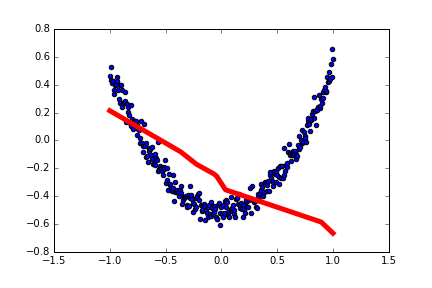

//anaconda/lib/python3.5/site-packages/matplotlib/backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


NotImplementedError: 

In [119]:
import tensorflow as tf

#定義自訂的隱藏層
def add_layer(inputs, in_size, out_size, activation_function='None'):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))     #因為是定義矩陣，習慣上命名開頭大寫
    baises = tf.Variable(tf.zeros([1,out_size]) + 0.1)             #baises是一個數列，不要為0比較好所以＋0.1
    #運算方程的部分(weight*x + baise)
    Wx_plus_b = tf.matmul(inputs,Weights) + baises
    #激活的部分
    if activation_function is None:
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    return output
    

import numpy as np

#建立數據
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)  #添加一些雜亂的數，較符合一般情況

y_data = np.square(x_data) - 0.5 + noise 




#使用placeholder，如果是需要分批次小部分X_data帶入的話，可以靠placeholder控制
xs = tf.placeholder(tf.float32,[None,1]) #[None,1] 代表格式是None(不限制)，資料量是1，ft.float32每次都要定義資料形式
ys = tf.placeholder(tf.float32,[None,1])




#建立輸入層，隱藏層，輸出層的結構

#隱藏層
layer_1 = add_layer(xs,1,10,activation_function= tf.nn.relu) #資料給的是：X_data,輸入1,神經元10
#輸出層
prediction = add_layer(layer_1,10,1, activation_function=None)




#誤差值loss  #誤差的平方然後將所有加總(reduce_sum)再平均，就可以知道次練習的平均總誤差
loss =  tf.reduce_mean(tf.reduce_sum(tf.square(y_data - prediction),reduction_indices=[1]))  

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


# important step
# tf.initialize_all_variables() no long valid from 之後版本不能用這指令
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()

sess = tf.Session()    
sess.run(init)



# 可視化部分
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)

plt.ion()
plt.show()

for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction,feed_dict={xs:x_data})
        lines = ax.plot(x_data,prediction_value,'r-',lw=5)
        plt.pause(0.3)
        
        
        


 * 可以看到誤差越來越小
 *  目前無法解決無法連續 plt的問題，似乎是 ＧＵＩ問題，用了%matplotlib nbagg都會卡在plt.pause會報錯
